# NBA Data set
#### This NBA games data comprises of a dataset with all games from the 2004 season to December 2020. The source of this information is from Kaggle (https://www.kaggle.com/nathanlauga/nba-games). The purpose of this dataset is to conduct a variety of comparative analyses to help us understand the strengths and weaknesses of certain players and teams in the NBA. We will also look to see what player/team statistics correlate to success in an NBA regular season. This data contains five datasets where they are all interconnected with each other. The players.csv data set contains 7229 objects with 4 attributes regarding information about the players currently in the NBA. The teams.csv data set has 31 objects with 14 attributes on information about NBA team stats, the ranking.csv dataset contains 198,343 objects and 12 attributes concerning the ranks amongst teams throughout each game. The games_details.csv has 626,112 objects and 29 attributes providing detailed data for each game, and finally, the games.csv dataset comprises of 25,025 objects with 21 attributes regarding general information about each game. The overall purpose of each dataset is to provide a better outlook of the NBA teams and how this information can be used to improve their performance in defence/offence in the game or analysis of future outcomes in the game.

# Table of contents
1. [Creating files for each task](#File)
2. [Task1](#Task1)
3. [Task2](#Task2)
4. [Task3](#Task3)
5. [Task4](#Task4)


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import joblib
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler

from time import time
%matplotlib inline
import os
from sklearn import tree
import pydotplus 
from IPython.display import Image



import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


data = pd.read_csv('games_details.csv')
data.head(30)
games= pd.read_csv('games.csv')
rankings = pd.read_csv('ranking.csv')
players= pd.read_csv('players.csv')
teams= pd.read_csv('teams.csv')


/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Clean continuous variables
    1. Fill in missing values
    2. Drop irrelevant/repetitive rows that have null values 


In [2]:
data.isnull().sum()


GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615626
START_POSITION       386736
COMMENT              523752
MIN                  102360
FGM                  102360
FGA                  102360
FG_PCT               102360
FG3M                 102360
FG3A                 102360
FG3_PCT              102360
FTM                  102360
FTA                  102360
FT_PCT               102360
OREB                 102360
DREB                 102360
REB                  102360
AST                  102360
STL                  102360
BLK                  102360
TO                   102360
PF                   102360
PTS                  102360
PLUS_MINUS           126021
dtype: int64

In [3]:
 games.isnull().sum()
# rankings.isnull().sum()
# players.isnull().sum()
# teams.isnull().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

In [4]:

# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = data[ data['FGM'].isnull() ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)
data.head(30)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
5,22100213,1610612764,WAS,Washington,203526,Raul Neto,Raul,NaN,NaN,17:59,...,0.0,0.0,0.0,3.0,0.0,0.0,3.0,2.0,2.0,-8.0
6,22100213,1610612764,WAS,Washington,1626149,Montrezl Harrell,Montrezl,NaN,NaN,22:12,...,5.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,15.0,-11.0
7,22100213,1610612764,WAS,Washington,1630166,Deni Avdija,Deni,NaN,NaN,24:59,...,2.0,9.0,11.0,0.0,0.0,1.0,0.0,1.0,9.0,-10.0
8,22100213,1610612764,WAS,Washington,1630557,Corey Kispert,Corey,NaN,NaN,11:25,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,6.0,-1.0
9,22100213,1610612764,WAS,Washington,1628988,Aaron Holiday,Aaron,NaN,NaN,12:53,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,-1.0


In [5]:
# data.dropna(axis=0,how='all')

# Get names of indexes for which column Age has value 30
indexNames = games[ games['FG_PCT_away'].isnull() ].index
# Delete these row indexes from dataFrame
games.drop(indexNames , inplace=True)
games.head(30)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2021-11-17,22100213,Final,1610612766,1610612764,2021,1610612766,97.0,0.438,0.500,...,30.0,59.0,1610612764,87.0,0.367,0.813,0.190,23.0,48.0,1
1,2021-11-17,22100214,Final,1610612765,1610612754,2021,1610612765,97.0,0.425,0.750,...,16.0,42.0,1610612754,89.0,0.418,0.737,0.243,14.0,43.0,1
2,2021-11-17,22100215,Final,1610612737,1610612738,2021,1610612737,110.0,0.506,0.833,...,28.0,40.0,1610612738,99.0,0.440,0.824,0.268,24.0,42.0,1
3,2021-11-17,22100216,Final,1610612751,1610612739,2021,1610612751,109.0,0.458,0.840,...,29.0,47.0,1610612739,99.0,0.393,0.857,0.250,20.0,50.0,1
4,2021-11-17,22100217,Final,1610612748,1610612740,2021,1610612748,113.0,0.483,0.824,...,29.0,39.0,1610612740,98.0,0.440,0.786,0.286,18.0,38.0,1
5,2021-11-17,22100218,Final,1610612752,1610612753,2021,1610612752,98.0,0.420,0.667,...,25.0,45.0,1610612753,104.0,0.406,0.833,0.289,20.0,51.0,0
6,2021-11-17,22100219,Final,1610612749,1610612747,2021,1610612749,109.0,0.460,0.708,...,22.0,52.0,1610612747,102.0,0.417,0.833,0.279,24.0,48.0,1
7,2021-11-17,22100220,Final,1610612750,1610612758,2021,1610612750,107.0,0.500,0.833,...,20.0,35.0,1610612758,97.0,0.366,0.760,0.263,19.0,47.0,1
8,2021-11-17,22100221,Final,1610612760,1610612745,2021,1610612760,101.0,0.446,0.563,...,18.0,56.0,1610612745,89.0,0.356,0.684,0.286,16.0,46.0,1
9,2021-11-17,22100222,Final,1610612756,1610612742,2021,1610612756,105.0,0.441,0.714,...,27.0,49.0,1610612742,98.0,0.413,1.000,0.500,28.0,50.0,1


In [6]:
games.isnull().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

#### Drop irrelevant/repetitive variables such as NICKNAME and COMMENT

In [7]:
data.drop(['NICKNAME'], axis=1, inplace=True)
data.drop(['COMMENT'], axis=1, inplace=True)
data.drop(['TEAM_ABBREVIATION'], axis=1, inplace=True)
data.drop(['TEAM_CITY'], axis=1, inplace=True)

# creating files for each task <a name="File"></a>

In [8]:
cleaned_data= data
cleaned_data.to_csv('cleanedGD.csv', index=False)
tsk2=pd.read_csv('cleanedGD.csv')
cleaned_games= games
cleaned_games.to_csv('cleanedGDgames.csv', index=False)
tsk1games= pd.read_csv('cleanedGDgames.csv')


### Task 2: File creation
Select a suitable table/object type from your data set for clustering analysis. If you have too many
data rows in this table, then only keep 1000 rows. Perform any necessary preprocessing steps. ive changed the startposition from letters to integers which are used to repersent each start position. 

In [9]:
tsk2_np= tsk2.head(1000)
tsk2= tsk2.head(1000)
START_POSITION_num = {'F': 1, 'C': 2,  'G': 3 }
tsk2['START_POSITION'] = tsk2['START_POSITION'].map(START_POSITION_num)
# tsk2['START_POSITION'] = tsk2['START_POSITION'].replace(np.nan, 4)
# tsk2['PLUS_MINUS'].fillna(tsk2['PLUS_MINUS'].mean(), inplace=True)
# tsk2.isnull().sum()
t2Target= tsk2['START_POSITION']
tsk2.drop(['PLUS_MINUS'], axis=1, inplace=True)
tsk2 = tsk2.dropna(how='any',axis=0) 
tsk2.drop(['GAME_ID'], axis=1, inplace=True)
tsk2.drop(['TEAM_ID'], axis=1, inplace=True)
tsk2.drop(['PLAYER_ID'], axis=1, inplace=True)
tsk2.drop(['MIN'], axis=1, inplace=True)
tsk2.drop(['FGM'], axis=1, inplace=True)
tsk2.drop(['FGA'], axis=1, inplace=True)
tsk2.drop(['FG3M'], axis=1, inplace=True)
tsk2.drop(['FG3A'], axis=1, inplace=True)

tsk2.drop(['DREB'], axis=1, inplace=True)
tsk2.drop(['OREB'], axis=1, inplace=True)
tsk2.drop(['FTM'], axis=1, inplace=True)
tsk2.drop(['FTA'], axis=1, inplace=True)
tsk2.drop(['TO'], axis=1, inplace=True)
tsk2.drop(['PLAYER_NAME'], axis=1, inplace=True)
# tsk2.drop(['START_POSITION'], axis=1, inplace=True)
# tsk2.drop(['FG_PCT'], axis=1, inplace=True)
tsk2.drop(['FG3_PCT'], axis=1, inplace=True)
tsk2.drop(['FT_PCT'], axis=1, inplace=True)
tsk2.drop(['PF'], axis=1, inplace=True)
# tsk2.drop(['BLK'], axis=1, inplace=True)
# tsk2.drop(['REB'], axis=1, inplace=True)
# tsk2.drop(['STL'], axis=1, inplace=True)
# tsk2.drop(['AST'], axis=1, inplace=True)
task_2= tsk2
task_2_np=tsk2_np 
task_2.to_csv('216359770-215614720-216846396-T2Mod.csv', index=False)
task_2_np.to_csv('216359770-215614720-216846396-T2Org.csv', index=False)
t2 = pd.read_csv('216359770-215614720-216846396-T2Mod.csv')
t2_np = pd.read_csv('216359770-215614720-216846396-T2Org.csv')
t2.head()

,START_POSITION,FG_PCT,REB,AST,STL,BLK,PTS
0,1.0,0.167,6.0,2.0,1.0,0.0,3.0
1,1.0,0.167,5.0,3.0,1.0,2.0,5.0
2,2.0,0.750,9.0,1.0,2.0,1.0,20.0
3,3.0,0.450,3.0,7.0,2.0,0.0,24.0
4,3.0,0.000,3.0,2.0,0.0,0.0,0.0


In [10]:
t2_np.head()

,GAME_ID,TEAM_ID,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22100213,1610612764,203484,Kentavious Caldwell-Pope,F,27:41,1.0,6.0,0.167,0.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
1,22100213,1610612764,1628398,Kyle Kuzma,F,30:28,2.0,12.0,0.167,1.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
2,22100213,1610612764,1629655,Daniel Gafford,C,24:21,9.0,12.0,0.750,0.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
3,22100213,1610612764,203078,Bradley Beal,G,35:07,9.0,20.0,0.450,5.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
4,22100213,1610612764,203915,Spencer Dinwiddie,G,28:34,0.0,5.0,0.000,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0


# Task 1: Describing the Data <a name="Task1"></a>

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# load datasets, get Toronto Raptors 2017 home game data

In [12]:
point_threshold = 10
year = 2017
details = pd.read_csv('games_details.csv')
games = pd.read_csv('games.csv')
data_2017 = games[games['SEASON'] == year]
# data_2018 = games[games['SEASON']==2018]
data_2017=data_2017[data_2017['HOME_TEAM_ID']==1610612761]
# data_2018=data_2018[data_2018['HOME_TEAM_ID']==1610612761]
data_2017=data_2017.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
# data_2018=data_2018.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})



/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# create transaction data representing all players in a team that scored more points than the point_threshold in a given game

In [13]:
aa_details = details[details['PTS']>=point_threshold]
aa_details = aa_details[['GAME_ID','TEAM_ID','PLAYER_NAME']]
aa_details['PLAYER_NAME'] = aa_details.groupby(['GAME_ID','TEAM_ID'])['PLAYER_NAME'].transform(lambda x: ','.join(x))
aa_details = aa_details[['GAME_ID','TEAM_ID','PLAYER_NAME']].drop_duplicates()
aa_details.head(30)

,GAME_ID,TEAM_ID,PLAYER_NAME
2,22100213,1610612764,"Daniel Gafford,Bradley Beal,Montrezl Harrell"
14,22100213,1610612766,"Miles Bridges,Mason Plumlee,Terry Rozier,LaMel..."
28,22100214,1610612754,"Domantas Sabonis,Caris LeVert,Malcolm Brogdon,..."
39,22100214,1610612765,"Saddiq Bey,Jerami Grant,Cade Cunningham,Frank ..."
51,22100215,1610612738,"Jayson Tatum,Grant Williams,Al Horford,Dennis ..."
65,22100215,1610612737,"Kevin Huerter,John Collins,Bogdan Bogdanovic,T..."
81,22100216,1610612739,"Dean Wade,Ricky Rubio,Darius Garland,Kevin Lov..."
92,22100216,1610612751,"Kevin Durant,Patty Mills,James Harden,LaMarcus..."
104,22100217,1610612740,"Josh Hart,Brandon Ingram,Jonas Valanciunas,Nic..."
119,22100217,1610612748,"Jimmy Butler,P.J. Tucker,Tyler Herro,Gabe Vinc..."


# get all Raptors 2017 games

In [14]:
data_2017=pd.merge(aa_details, data_2017, on=["GAME_ID","TEAM_ID"])
# data_2018=pd.merge(aa_details, data_2018, on=["GAME_ID","TEAM_ID"])
data_2017.head(30)

,GAME_ID,TEAM_ID,PLAYER_NAME,GAME_DATE_EST,GAME_STATUS_TEXT,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,41700202,1610612761,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Fre...",2018-05-03,Final,1610612739,2017,1610612761,110.0,0.543,...,26.0,35.0,1610612739,128.0,0.595,0.739,0.423,25.0,34.0,0
1,41700201,1610612761,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Pas...",2018-05-01,Final,1610612739,2017,1610612761,112.0,0.429,...,26.0,50.0,1610612739,113.0,0.412,0.714,0.400,25.0,45.0,0
2,41700105,1610612761,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Del...",2018-04-25,Final,1610612764,2017,1610612761,108.0,0.463,...,26.0,35.0,1610612764,98.0,0.411,0.864,0.192,21.0,50.0,1
3,41700102,1610612761,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky...",2018-04-17,Final,1610612764,2017,1610612761,130.0,0.517,...,24.0,48.0,1610612764,119.0,0.488,0.893,0.455,26.0,34.0,1
4,41700101,1610612761,"OG Anunoby,Serge Ibaka,DeMar DeRozan,Kyle Lowr...",2018-04-14,Final,1610612764,2017,1610612761,114.0,0.532,...,26.0,38.0,1610612764,106.0,0.477,0.889,0.381,29.0,35.0,1
5,21701200,1610612761,"OG Anunoby,Serge Ibaka,Norman Powell,Kyle Lowr...",2018-04-08,Final,1610612753,2017,1610612761,112.0,0.500,...,28.0,47.0,1610612753,101.0,0.472,0.588,0.304,25.0,42.0,1
6,21701187,1610612761,"Serge Ibaka,DeMar DeRozan,Jakob Poeltl",2018-04-06,Final,1610612754,2017,1610612761,92.0,0.429,...,27.0,52.0,1610612754,73.0,0.299,0.700,0.333,16.0,44.0,1
7,21701171,1610612761,"Serge Ibaka,DeMar DeRozan,Kyle Lowry,Fred VanV...",2018-04-04,Final,1610612738,2017,1610612761,96.0,0.435,...,23.0,48.0,1610612738,78.0,0.333,0.893,0.136,10.0,43.0,1
8,21701109,1610612761,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky...",2018-03-27,Final,1610612743,2017,1610612761,114.0,0.511,...,33.0,37.0,1610612743,110.0,0.472,0.929,0.433,26.0,40.0,1
9,21701097,1610612761,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky...",2018-03-25,Final,1610612746,2017,1610612761,106.0,0.446,...,24.0,48.0,1610612746,117.0,0.463,0.778,0.444,17.0,44.0,0


In [15]:
data_2017 = data_2017[['GAME_ID','PLAYER_NAME']]
# data_2018 = data_2018[['GAME_ID','PLAYER_NAME']]
data_2017

,GAME_ID,PLAYER_NAME
0,41700202,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Fre..."
1,41700201,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Pas..."
2,41700105,"Jonas Valanciunas,DeMar DeRozan,Kyle Lowry,Del..."
3,41700102,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky..."
4,41700101,"OG Anunoby,Serge Ibaka,DeMar DeRozan,Kyle Lowr..."
5,21701200,"OG Anunoby,Serge Ibaka,Norman Powell,Kyle Lowr..."
6,21701187,"Serge Ibaka,DeMar DeRozan,Jakob Poeltl"
7,21701171,"Serge Ibaka,DeMar DeRozan,Kyle Lowry,Fred VanV..."
8,21701109,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky..."
9,21701097,"Serge Ibaka,Jonas Valanciunas,DeMar DeRozan,Ky..."


In [16]:
transactions = []
for x, row in data_2017.iterrows():
    row = row['PLAYER_NAME'].split(',')
    row.sort()
    transactions.append(row)
    
transactions

[['DeMar DeRozan', 'Fred VanVleet', 'Jonas Valanciunas', 'Kyle Lowry'],
 ['DeMar DeRozan', 'Jonas Valanciunas', 'Kyle Lowry', 'Pascal Siakam'],
 ['DeMar DeRozan', 'Delon Wright', 'Jonas Valanciunas', 'Kyle Lowry'],
 ['CJ Miles',
  'DeMar DeRozan',
  'Delon Wright',
  'Jonas Valanciunas',
  'Kyle Lowry',
  'Serge Ibaka'],
 ['CJ Miles',
  'DeMar DeRozan',
  'Delon Wright',
  'Kyle Lowry',
  'OG Anunoby',
  'Serge Ibaka'],
 ['CJ Miles',
  'Delon Wright',
  'Jakob Poeltl',
  'Kyle Lowry',
  'Norman Powell',
  'OG Anunoby',
  'Serge Ibaka'],
 ['DeMar DeRozan', 'Jakob Poeltl', 'Serge Ibaka'],
 ['DeMar DeRozan', 'Fred VanVleet', 'Kyle Lowry', 'Serge Ibaka'],
 ['DeMar DeRozan',
  'Fred VanVleet',
  'Jakob Poeltl',
  'Jonas Valanciunas',
  'Kyle Lowry',
  'Pascal Siakam',
  'Serge Ibaka'],
 ['CJ Miles',
  'DeMar DeRozan',
  'Fred VanVleet',
  'Jonas Valanciunas',
  'Kyle Lowry',
  'Pascal Siakam',
  'Serge Ibaka'],
 ['DeMar DeRozan',
  'Fred VanVleet',
  'Jonas Valanciunas',
  'Kyle Lowry',
  '

In [17]:
# number of transactions
N = len(transactions)
N

48

## Frequent Itemset Generation

In [18]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [19]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [20]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
num_items = len(df.columns)
num_items

12

In [21]:
minsup = 0.1
minconf = 0.7

In [22]:
candidate_itemsets = apriori(df, min_support=0.0001, use_colnames=True) # all candidates
frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True) # frequent candidates

In [23]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
candidate_itemsets['length'] = candidate_itemsets['itemsets'].apply(lambda x: len(x))

# getting candidate itemsets that are within range[lg(items), items/2] with maximal support

In [24]:
rangeT = (int(math.log(num_items,2)), int(num_items/2))
rangeT

(3, 6)

In [25]:
ci = candidate_itemsets[ ((candidate_itemsets['length'] >= rangeT[0]) &
                          (candidate_itemsets['length'] <=rangeT[1]))].sort_values(by ='support', ascending=False).head(10)
ci = ci.reset_index()
ci.drop(['index'], axis = 1, inplace=True)
minsup = ci['support'].min()
ci

,support,itemsets,length
0,0.541667,"(DeMar DeRozan, Kyle Lowry, Jonas Valanciunas)",3
1,0.458333,"(Serge Ibaka, DeMar DeRozan, Kyle Lowry)",3
2,0.395833,"(Serge Ibaka, DeMar DeRozan, Jonas Valanciunas)",3
3,0.354167,"(DeMar DeRozan, Kyle Lowry, Fred VanVleet)",3
4,0.312500,"(CJ Miles, DeMar DeRozan, Kyle Lowry)",3
5,0.312500,"(Serge Ibaka, DeMar DeRozan, Fred VanVleet)",3
6,0.312500,"(DeMar DeRozan, Jonas Valanciunas, Fred VanVleet)",3
7,0.291667,"(CJ Miles, DeMar DeRozan, Jonas Valanciunas)",3
8,0.291667,"(Serge Ibaka, DeMar DeRozan, Kyle Lowry, Jonas...",4
9,0.291667,"(Serge Ibaka, Kyle Lowry, Jonas Valanciunas)",3


# creating association rules

In [26]:
ar = association_rules(candidate_itemsets, metric="confidence")
ar_sort = ar.sort_values(by ='confidence', ascending=False)
ar_sort['IS'] = (ar_sort['support'])/np.sqrt((ar_sort['antecedent support'])*(ar_sort['consequent support']))
ar_sort['length'] = ar_sort['antecedents'].apply(lambda x: len(x))
ar_sort['length'] += ar_sort['consequents'].apply(lambda x: len(x))

# getting top 5 and bottom 5 rules

In [27]:
rules = ar_sort[( ( ar_sort['support'] >= minsup ) & (ar_sort['length']>=rangeT[0]))]
top5_rules = rules.head(5)
bot5_rules = rules.tail(5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,IS,length
301,"(Serge Ibaka, Kyle Lowry, Jonas Valanciunas)",(DeMar DeRozan),0.291667,0.958333,0.291667,1.000000,1.043478,0.012153,inf,0.551677,4
55,"(Kyle Lowry, Jonas Valanciunas)",(DeMar DeRozan),0.541667,0.958333,0.541667,1.000000,1.043478,0.022569,inf,0.751809,3
43,"(Kyle Lowry, Fred VanVleet)",(DeMar DeRozan),0.354167,0.958333,0.354167,1.000000,1.043478,0.014757,inf,0.607919,3
68,"(Serge Ibaka, Kyle Lowry)",(DeMar DeRozan),0.479167,0.958333,0.458333,0.956522,0.998110,-0.000868,0.958333,0.676363,3
61,"(Serge Ibaka, Jonas Valanciunas)",(DeMar DeRozan),0.416667,0.958333,0.395833,0.950000,0.991304,-0.003472,0.833333,0.626411,3
47,"(Serge Ibaka, Fred VanVleet)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
23,"(CJ Miles, Kyle Lowry)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
42,"(Fred VanVleet, Jonas Valanciunas)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
22,"(CJ Miles, Jonas Valanciunas)",(DeMar DeRozan),0.312500,0.958333,0.291667,0.933333,0.973913,-0.007812,0.625000,0.532971,3
54,"(DeMar DeRozan, Jonas Valanciunas)",(Kyle Lowry),0.666667,0.791667,0.541667,0.812500,1.026316,0.013889,1.111111,0.745601,3


In [28]:
top5_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,IS,length
301,"(Serge Ibaka, Kyle Lowry, Jonas Valanciunas)",(DeMar DeRozan),0.291667,0.958333,0.291667,1.000000,1.043478,0.012153,inf,0.551677,4
55,"(Kyle Lowry, Jonas Valanciunas)",(DeMar DeRozan),0.541667,0.958333,0.541667,1.000000,1.043478,0.022569,inf,0.751809,3
43,"(Kyle Lowry, Fred VanVleet)",(DeMar DeRozan),0.354167,0.958333,0.354167,1.000000,1.043478,0.014757,inf,0.607919,3
68,"(Serge Ibaka, Kyle Lowry)",(DeMar DeRozan),0.479167,0.958333,0.458333,0.956522,0.998110,-0.000868,0.958333,0.676363,3
61,"(Serge Ibaka, Jonas Valanciunas)",(DeMar DeRozan),0.416667,0.958333,0.395833,0.950000,0.991304,-0.003472,0.833333,0.626411,3


In [29]:
bot5_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,IS,length
47,"(Serge Ibaka, Fred VanVleet)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
23,"(CJ Miles, Kyle Lowry)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
42,"(Fred VanVleet, Jonas Valanciunas)",(DeMar DeRozan),0.333333,0.958333,0.312500,0.937500,0.978261,-0.006944,0.666667,0.552907,3
22,"(CJ Miles, Jonas Valanciunas)",(DeMar DeRozan),0.312500,0.958333,0.291667,0.933333,0.973913,-0.007812,0.625000,0.532971,3
54,"(DeMar DeRozan, Jonas Valanciunas)",(Kyle Lowry),0.666667,0.791667,0.541667,0.812500,1.026316,0.013889,1.111111,0.745601,3


# applying z-scores

In [30]:
liftmean = ar_sort['lift'].mean()
liftsd = ar_sort['lift'].std()
liftmean

3.679717563414518

In [31]:
levmean = ar_sort['leverage'].mean()
levsd = ar_sort['leverage'].std()
levmean

0.012734913147649034

In [32]:
ar_sort['lift z-score'] = (ar_sort['lift'] - liftmean)/liftsd
ar_sort['leverage z-score'] = (ar_sort['leverage'] - levmean)/levsd
ar_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,IS,length,lift z-score,leverage z-score
927,"(Jonas Valanciunas, Delon Wright, Pascal Siaka...",(Serge Ibaka),0.020833,0.645833,0.020833,1.000000,1.548387,0.007378,inf,0.179605,5,-0.437380,-0.582632
1246,"(Jonas Valanciunas, Delon Wright, Pascal Siaka...","(CJ Miles, Fred VanVleet)",0.020833,0.229167,0.020833,1.000000,4.363636,0.016059,inf,0.301511,6,0.140350,0.361571
1244,"(Delon Wright, Jakob Poeltl, Pascal Siakam, Fr...","(CJ Miles, Jonas Valanciunas)",0.020833,0.312500,0.020833,1.000000,3.200000,0.014323,inf,0.258199,6,-0.098445,0.172731
1243,"(Pascal Siakam, Jakob Poeltl, CJ Miles, Delon ...",(Fred VanVleet),0.020833,0.479167,0.020833,1.000000,2.086957,0.010851,inf,0.208514,6,-0.326857,-0.204951
1242,"(Fred VanVleet, Pascal Siakam, Jakob Poeltl, D...",(CJ Miles),0.020833,0.458333,0.020833,1.000000,2.181818,0.011285,inf,0.213201,6,-0.307390,-0.157740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,(OG Anunoby),(CJ Miles),0.125000,0.458333,0.104167,0.833333,1.818182,0.046875,3.250000,0.435194,2,-0.382014,3.713491
4,(Jakob Poeltl),(DeMar DeRozan),0.229167,0.958333,0.187500,0.818182,0.853755,-0.032118,0.229167,0.400099,2,-0.579928,-4.878754
54,"(DeMar DeRozan, Jonas Valanciunas)",(Kyle Lowry),0.666667,0.791667,0.541667,0.812500,1.026316,0.013889,1.111111,0.745601,3,-0.544516,0.125520
6,(DeMar DeRozan),(Kyle Lowry),0.958333,0.791667,0.770833,0.804348,1.016018,0.012153,1.064815,0.884975,2,-0.546629,-0.063320


In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# load datasets, get Toronto Raptors 2017 home game data

point_threshold = 10
year = 2017
details = pd.read_csv('games_details.csv')
games = pd.read_csv('games.csv')
data_2017 = games[games['SEASON'] == year]
# data_2018 = games[games['SEASON']==2018]
data_2017=data_2017[data_2017['HOME_TEAM_ID']==1610612761]
# data_2018=data_2018[data_2018['HOME_TEAM_ID']==1610612761]
data_2017=data_2017.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})
# data_2018=data_2018.rename(columns={'HOME_TEAM_ID':'TEAM_ID'})



# create transaction data representing all players in a team that scored more points than the point_threshold in a given game

aa_details = details[details['PTS']>=point_threshold]
aa_details = aa_details[['GAME_ID','TEAM_ID','PLAYER_NAME']]
aa_details['PLAYER_NAME'] = aa_details.groupby(['GAME_ID','TEAM_ID'])['PLAYER_NAME'].transform(lambda x: ','.join(x))
aa_details = aa_details[['GAME_ID','TEAM_ID','PLAYER_NAME']].drop_duplicates()
aa_details.head(30)

# get all Raptors 2017 games

data_2017=pd.merge(aa_details, data_2017, on=["GAME_ID","TEAM_ID"])
# data_2018=pd.merge(aa_details, data_2018, on=["GAME_ID","TEAM_ID"])
data_2017.head(30)

data_2017 = data_2017[['GAME_ID','PLAYER_NAME']]
# data_2018 = data_2018[['GAME_ID','PLAYER_NAME']]
data_2017

transactions = []
for x, row in data_2017.iterrows():
    row = row['PLAYER_NAME'].split(',')
    row.sort()
    transactions.append(row)
    
transactions

# number of transactions
N = len(transactions)
N

## Frequent Itemset Generation

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
num_items = len(df.columns)
num_items

minsup = 0.1
minconf = 0.7

candidate_itemsets = apriori(df, min_support=0.0001, use_colnames=True) # all candidates
frequent_itemsets = apriori(df, min_support=minsup, use_colnames=True) # frequent candidates

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
candidate_itemsets['length'] = candidate_itemsets['itemsets'].apply(lambda x: len(x))

# getting candidate itemsets that are within range[lg(items), items/2] with maximal support

rangeT = (int(math.log(num_items,2)), int(num_items/2))
rangeT

ci = candidate_itemsets[ ((candidate_itemsets['length'] >= rangeT[0]) &
                          (candidate_itemsets['length'] <=rangeT[1]))].sort_values(by ='support', ascending=False).head(10)
ci = ci.reset_index()
ci.drop(['index'], axis = 1, inplace=True)
minsup = ci['support'].min()
ci

# creating association rules

ar = association_rules(candidate_itemsets, metric="confidence")
ar_sort = ar.sort_values(by ='confidence', ascending=False)
ar_sort['IS'] = (ar_sort['support'])/np.sqrt((ar_sort['antecedent support'])*(ar_sort['consequent support']))
ar_sort['length'] = ar_sort['antecedents'].apply(lambda x: len(x))
ar_sort['length'] += ar_sort['consequents'].apply(lambda x: len(x))

# getting top 5 and bottom 5 rules

rules = ar_sort[( ( ar_sort['support'] >= minsup ) & (ar_sort['length']>=rangeT[0]))]
top5_rules = rules.head(5)
bot5_rules = rules.tail(5)
rules

top5_rules

bot5_rules

# applying z-scores

liftmean = ar_sort['lift'].mean()
liftsd = ar_sort['lift'].std()
liftmean

levmean = ar_sort['leverage'].mean()
levsd = ar_sort['leverage'].std()
levmean

ar_sort['lift z-score'] = (ar_sort['lift'] - liftmean)/liftsd
ar_sort['leverage z-score'] = (ar_sort['leverage'] - levmean)/levsd
ar_sort



/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,IS,length,lift z-score,leverage z-score
927,"(Jonas Valanciunas, Delon Wright, Pascal Siaka...",(Serge Ibaka),0.020833,0.645833,0.020833,1.000000,1.548387,0.007378,inf,0.179605,5,-0.437380,-0.582632
1246,"(Jonas Valanciunas, Delon Wright, Pascal Siaka...","(CJ Miles, Fred VanVleet)",0.020833,0.229167,0.020833,1.000000,4.363636,0.016059,inf,0.301511,6,0.140350,0.361571
1244,"(Delon Wright, Jakob Poeltl, Pascal Siakam, Fr...","(CJ Miles, Jonas Valanciunas)",0.020833,0.312500,0.020833,1.000000,3.200000,0.014323,inf,0.258199,6,-0.098445,0.172731
1243,"(Pascal Siakam, Jakob Poeltl, CJ Miles, Delon ...",(Fred VanVleet),0.020833,0.479167,0.020833,1.000000,2.086957,0.010851,inf,0.208514,6,-0.326857,-0.204951
1242,"(Fred VanVleet, Pascal Siakam, Jakob Poeltl, D...",(CJ Miles),0.020833,0.458333,0.020833,1.000000,2.181818,0.011285,inf,0.213201,6,-0.307390,-0.157740
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,(OG Anunoby),(CJ Miles),0.125000,0.458333,0.104167,0.833333,1.818182,0.046875,3.250000,0.435194,2,-0.382014,3.713491
4,(Jakob Poeltl),(DeMar DeRozan),0.229167,0.958333,0.187500,0.818182,0.853755,-0.032118,0.229167,0.400099,2,-0.579928,-4.878754
54,"(DeMar DeRozan, Jonas Valanciunas)",(Kyle Lowry),0.666667,0.791667,0.541667,0.812500,1.026316,0.013889,1.111111,0.745601,3,-0.544516,0.125520
6,(DeMar DeRozan),(Kyle Lowry),0.958333,0.791667,0.770833,0.804348,1.016018,0.012153,1.064815,0.884975,2,-0.546629,-0.063320


# Task 2: <a name="Task2"></a>
### Perform the k-means clustering of your data with k=3, 4, 5 and Euclidian distance.

The only preprocessing we have done is changing the START_POSITION dimension from string value to numerical for better analysis when running various statistical analysis on them. 

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [36]:
%matplotlib inline
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

In [37]:
t2

,START_POSITION,FG_PCT,REB,AST,STL,BLK,PTS
0,1.0,0.167,6.0,2.0,1.0,0.0,3.0
1,1.0,0.167,5.0,3.0,1.0,2.0,5.0
2,2.0,0.750,9.0,1.0,2.0,1.0,20.0
3,3.0,0.450,3.0,7.0,2.0,0.0,24.0
4,3.0,0.000,3.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
465,1.0,0.357,9.0,2.0,0.0,0.0,15.0
466,1.0,0.714,2.0,3.0,0.0,0.0,14.0
467,2.0,0.714,8.0,3.0,0.0,0.0,12.0
468,3.0,0.400,0.0,5.0,0.0,1.0,5.0


In [38]:
X = scale(t2)
y = pd.DataFrame(t2Target)

X[0:10]

array([[-1.11803399e+00, -1.56895355e+00,  1.55809215e-02,
        -4.45239216e-01,  5.94951247e-03, -6.62468671e-01,
        -1.40324784e+00],
       [-1.11803399e+00, -1.56895355e+00, -2.77340402e-01,
        -1.05527476e-01,  5.94951247e-03,  1.56950463e+00,
        -1.16376836e+00],
       [ 0.00000000e+00,  1.65752541e+00,  8.94344893e-01,
        -7.84950955e-01,  9.38039800e-01,  4.53517979e-01,
         6.32327731e-01],
       [ 1.11803399e+00, -2.75535957e-03, -8.63183050e-01,
         1.25331948e+00,  9.38039800e-01, -6.62468671e-01,
         1.11128669e+00],
       [ 1.11803399e+00, -2.49317651e+00, -8.63183050e-01,
        -4.45239216e-01, -9.26140775e-01, -6.62468671e-01,
        -1.76246706e+00],
       [-1.11803399e+00, -9.10375512e-01,  1.55809215e-02,
        -7.84950955e-01, -9.26140775e-01, -6.62468671e-01,
        -8.04549144e-01],
       [-1.11803399e+00,  4.56588986e-01,  1.18726622e+00,
         5.73896002e-01, -9.26140775e-01,  4.53517979e-01,
         2.7310851

### Building and running your model

In [39]:
clustering = KMeans(n_clusters=3, random_state=5)

clustering.fit(X)
# label = clustering.labels_
# label_df= pd.DataFrame(data=label,columns=["class"],index = t2.index)
# final_df= t2.join(label_df)
# final_df

KMeans(n_clusters=3, random_state=5)

### sum of squared errors for k=3

In [40]:
clustering.inertia_

2313.8427771887687

### Plotting your model outputs

In [41]:
iris_df = pd.DataFrame(t2)
iris_df.columns = [ 'START_POSITION','FG_PCT','REB','AST','STL','BLK','PTS']
y.columns = ['Targets']

Text(0.5, 1.0, 'K-Means Classification')

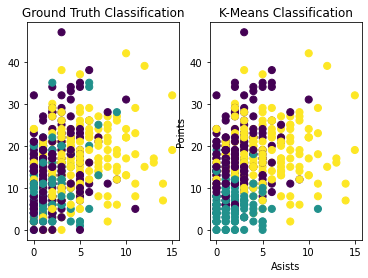

In [42]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=iris_df.START_POSITION, s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.xlabel('Asists')
plt.ylabel("Points")
plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=clustering.labels_, s=50)

plt.title('K-Means Classification')

With this information we can observe for when k=3 that:

**Observation1:** there is a cluster with the lowest assists and points.

**Observation2:** there is another cluster with the lowest assists and average points

**Observation3:** there is a cluster with the most points and assists 

### k=4

In [43]:
clustering = KMeans(n_clusters=4, random_state=5)

clustering.fit(X)


KMeans(n_clusters=4, random_state=5)

### SSE when k=4

In [44]:
clustering.inertia_

2100.966345177319

Text(0.5, 1.0, 'K-Means Classification')

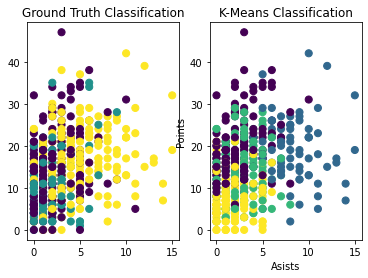

In [45]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue', 'green'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=iris_df.START_POSITION, s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.xlabel('Asists')
plt.ylabel("Points")
plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=clustering.labels_, s=50)

plt.title('K-Means Classification')

With this information we can observe for when k=4 that:

**Observation1:** there is a cluster of with the lowest assists and points.

**Observation2:** there is another cluster with lowest assists and average points

**Observation3:** there is another cluster with lowest assists and average pointsc                                                                      
**Observation4:** there is a cluster with the most points and assists 

### K=5

In [46]:
clustering = KMeans(n_clusters=5, random_state=5)

clustering.fit(X)
label = clustering.labels_


### sum of squared errors for k=5

In [47]:
clustering.inertia_

1897.415246451841

Text(0.5, 1.0, 'K-Means Classification')

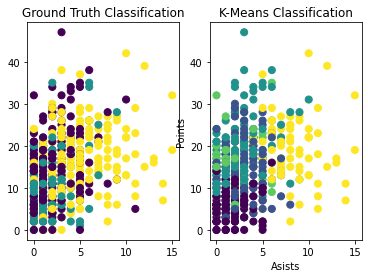

In [48]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue', 'green', 'red'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=iris_df.START_POSITION, s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.xlabel('Asists')
plt.ylabel("Points")
plt.scatter(x=iris_df.AST, y=iris_df.PTS, c=clustering.labels_, s=50)

plt.title('K-Means Classification')

With this information we can observe for when k=5 that:

**Observation1:** there is a cluster with the lowest assists and points.

**Observation2:** three other clusters are all jumbled together 

**Observation3:** there is a cluster with the most points and assists 

In [49]:
### K=5 has the lowest SSE

In [50]:
label_df= pd.DataFrame(data=label,columns=["class"],index = t2.index)
final_df= t2.join(label_df)

final_df.to_csv('216359770-215614720-216846396-T2Class.csv', index=False)
final_df

,START_POSITION,FG_PCT,REB,AST,STL,BLK,PTS,class
0,1.0,0.167,6.0,2.0,1.0,0.0,3.0,0
1,1.0,0.167,5.0,3.0,1.0,2.0,5.0,0
2,2.0,0.750,9.0,1.0,2.0,1.0,20.0,2
3,3.0,0.450,3.0,7.0,2.0,0.0,24.0,4
4,3.0,0.000,3.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
465,1.0,0.357,9.0,2.0,0.0,0.0,15.0,2
466,1.0,0.714,2.0,3.0,0.0,0.0,14.0,2
467,2.0,0.714,8.0,3.0,0.0,0.0,12.0,2
468,3.0,0.400,0.0,5.0,0.0,1.0,5.0,1


although the SSE is the lowest for k-5 the best cluster amount should be 4 since there are 4 starting positions.

# Task 3: <a name="Task3"></a>
### Create a naïve bayes classifier for your data set.

## Naive Bayes Classifiers

In [51]:
import numpy as np
import pandas as pd
import urllib
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Naive Bayes
### Using Naive Bayes to predict spam

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, iris_df.START_POSITION, test_size=.2, random_state=17)

### measure 1

In [54]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.8297872340425532


### measure 2

In [55]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)


y_pred = GausNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

GaussianNB()
1.0


### measure 3

In [56]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)

print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.851063829787234


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

In [75]:
t3 = pd.read_csv('216359770-215614720-216846396-T2Class.csv')
# y = t3.START_POSITION
# t3 = t3.drop(['START_POSITION'], axis=1, inplace=True)
# xrp = scale(t3)

X = scale(t3)
t3Target= t3['START_POSITION']
y = pd.DataFrame(t3Target)


array([[-1.11803399e+00, -1.56895355e+00,  1.55809215e-02,
        -4.45239216e-01,  5.94951247e-03, -6.62468671e-01,
        -1.40324784e+00, -1.27946620e+00],
       [-1.11803399e+00, -1.56895355e+00, -2.77340402e-01,
        -1.05527476e-01,  5.94951247e-03,  1.56950463e+00,
        -1.16376836e+00, -1.27946620e+00],
       [ 0.00000000e+00,  1.65752541e+00,  8.94344893e-01,
        -7.84950955e-01,  9.38039800e-01,  4.53517979e-01,
         6.32327731e-01,  2.22029715e-01],
       [ 1.11803399e+00, -2.75535957e-03, -8.63183050e-01,
         1.25331948e+00,  9.38039800e-01, -6.62468671e-01,
         1.11128669e+00,  1.72352563e+00],
       [ 1.11803399e+00, -2.49317651e+00, -8.63183050e-01,
        -4.45239216e-01, -9.26140775e-01, -6.62468671e-01,
        -1.76246706e+00, -1.27946620e+00],
       [-1.11803399e+00, -9.10375512e-01,  1.55809215e-02,
        -7.84950955e-01, -9.26140775e-01, -6.62468671e-01,
        -8.04549144e-01, -1.27946620e+00],
       [-1.11803399e+00,  4.565889

In [ ]:
#define cross-validation method to use
cv = KFold(n_splits=3, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))

### ROC curve

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  warnings.warn("Label %s is present in all training examples." %
/Users/harismuhammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


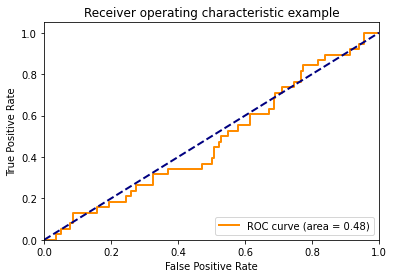

In [77]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# Task 4  <a name="Task4"></a>

We answered 3/5 of our questions, our questions are answerable but we need more analysis on the data set inroder to find the answer. The questions were answered throuout the analysis.

I Milan Drapic student ID # 215614720 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Milan Drapic

I Yudthesvar Raj student ID # 216846396 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Yudthesvar Raj

I Haris Muhammad student ID # 216359770 acknowledge that I have contributed
at least 30% time and effort to the preparation of this report and work discussed
herein.
Student_Signature Haris Muhammad